<a href="https://colab.research.google.com/github/sumedhsp04/sumedhsp04/blob/main/Predicting_used_car_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting used car prices

In this notebook, I'll work with the [Kaggle](https://www.kaggle.com/avikasliwal/used-cars-price-prediction) dataset about used cars and their prices. The notebook first includes exploration of the dataset followed by prediction of prices.

## Import libraries

I'll import `datetime` to handle year, `numpy` to work with arrays and `pandas` to read in the dataset files, `matplotlib` & `seaborn` for plotting and `sklearn` for various machine learning models.

In [ ]:
import datetime

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeRegressor

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


## Read dataset

I'll read the dataset and get information about it.

In [ ]:
train= pd.read_csv('/content/gdrive/My Drive/Ai/train-data.csv')
test= pd.read_csv('/content/gdrive/My Drive/Ai/test-data.csv')

In [ ]:
train.head()


,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


Let's first split the dataset into train and test datasets.

In [ ]:
train.shape

(6019, 14)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1234 non-null   int64  
 1   Name               1234 non-null   object 
 2   Location           1234 non-null   object 
 3   Year               1234 non-null   int64  
 4   Kilometers_Driven  1234 non-null   int64  
 5   Fuel_Type          1234 non-null   object 
 6   Transmission       1234 non-null   object 
 7   Owner_Type         1234 non-null   object 
 8   Mileage            1234 non-null   object 
 9   Engine             1224 non-null   object 
 10  Power              1224 non-null   object 
 11  Seats              1223 non-null   float64
 12  New_Price          182 non-null    object 
dtypes: float64(1), int64(3), object(9)
memory usage: 125.5+ KB


#***Data Preprocessing and Cleaning***

In [ ]:
train.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [ ]:
train.drop(["Unnamed: 0","New_Price"],axis=1,inplace=True)
test.drop(["Unnamed: 0","New_Price"],axis=1,inplace=True)

In [ ]:
new1 = train["Mileage"].str.split(" ", n = 1, expand = True)
train["Mileage_"]= new1[0]
train.drop(columns =["Mileage"], inplace = True)

new = test["Mileage"].str.split(" ", n = 1, expand = True)
test["Mileage_"]= new[0]
test.drop(columns =["Mileage"], inplace = True)

In [ ]:
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Power,Seats,Price,Mileage_
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,998 CC,58.16 bhp,5.0,1.75,26.6
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,1582 CC,126.2 bhp,5.0,12.50,19.67
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,1199 CC,88.7 bhp,5.0,4.50,18.2
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,1248 CC,88.76 bhp,7.0,6.00,20.77
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,1968 CC,140.8 bhp,5.0,17.74,15.2


In [ ]:
train['Mileage_'].fillna(value = train.Mileage_.median(), inplace = True)
test['Mileage_'].fillna(value = test.Mileage_.median(), inplace = True)

In [ ]:
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Power,Seats,Price,Mileage_
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,998 CC,58.16 bhp,5.0,1.75,26.6
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,1582 CC,126.2 bhp,5.0,12.50,19.67
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,1199 CC,88.7 bhp,5.0,4.50,18.2
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,1248 CC,88.76 bhp,7.0,6.00,20.77
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,1968 CC,140.8 bhp,5.0,17.74,15.2


In [ ]:
train.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Engine               36
Power                36
Seats                42
Price                 0
Mileage_              0
dtype: int64

In [ ]:
test.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Engine               10
Power                10
Seats                11
Mileage_              0
dtype: int64

In [ ]:
train['Seats'].fillna(method = 'ffill', inplace = True)
test['Seats'].fillna(method = 'ffill', inplace = True)

In [ ]:
new2 = train["Engine"].str.split(" ", n = 1, expand = True)
train["Eng"]= new2[0]
train.drop(columns =["Engine"], inplace = True)

new3= train["Power"].str.split(" ", n = 1, expand = True)
train["Pow"]= new3[0]
train.drop(columns =["Power"], inplace = True)

new4 = test["Engine"].str.split(" ", n = 1, expand = True)
test["Eng"]= new4[0]
test.drop(columns =["Engine"], inplace = True)

new5= test["Power"].str.split(" ", n = 1, expand = True)
test["Pow"]= new5[0]
test.drop(columns =["Power"], inplace = True)


In [ ]:
train['Eng'].fillna(value = train.Eng.median(), inplace = True)
test['Eng'].fillna(value = test.Eng.median(), inplace = True)
train['Pow'] = train['Pow'].fillna(74 )
test['Pow'] = test['Pow'].fillna(74)

In [ ]:
train.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Seats                0
Price                0
Mileage_             0
Eng                  0
Pow                  0
dtype: int64

In [ ]:
test.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Seats                0
Mileage_             0
Eng                  0
Pow                  0
dtype: int64

In [ ]:
train['Model']=train['Name'].map(lambda x: str(x).strip().split(" ")[1])
train['Name']=train['Name'].map(lambda x: str(x).strip().split(" ")[0])

In [ ]:
test['Model']=test['Name'].map(lambda x: str(x).strip().split(" ")[1])
test['Name']=test['Name'].map(lambda x: str(x).strip().split(" ")[0])

In [ ]:
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Mileage_,Eng,Pow,Model
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,5.0,1.75,26.6,998,58.16,Wagon
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,5.0,12.50,19.67,1582,126.2,Creta
2,Honda,Chennai,2011,46000,Petrol,Manual,First,5.0,4.50,18.2,1199,88.7,Jazz
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,7.0,6.00,20.77,1248,88.76,Ertiga
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,17.74,15.2,1968,140.8,A4


In [ ]:
test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Mileage_,Eng,Pow,Model
0,Maruti,Delhi,2014,40929,CNG,Manual,First,4.0,32.26,998,58.2,Alto
1,Maruti,Coimbatore,2013,54493,Petrol,Manual,Second,5.0,24.7,796,47.3,Alto
2,Toyota,Mumbai,2017,34000,Diesel,Manual,First,7.0,13.68,2393,147.8,Innova
3,Toyota,Hyderabad,2012,139000,Diesel,Manual,First,5.0,23.59,1364,null,Etios
4,Hyundai,Mumbai,2014,29000,Petrol,Manual,First,5.0,18.5,1197,82.85,i20


In [ ]:
print(train['Location'].unique())
print(train['Fuel_Type'].unique())
print(train['Transmission'].unique())
print(train['Owner_Type'].unique())

['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']
['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']
['Manual' 'Automatic']
['First' 'Second' 'Fourth & Above' 'Third']


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 160.0)

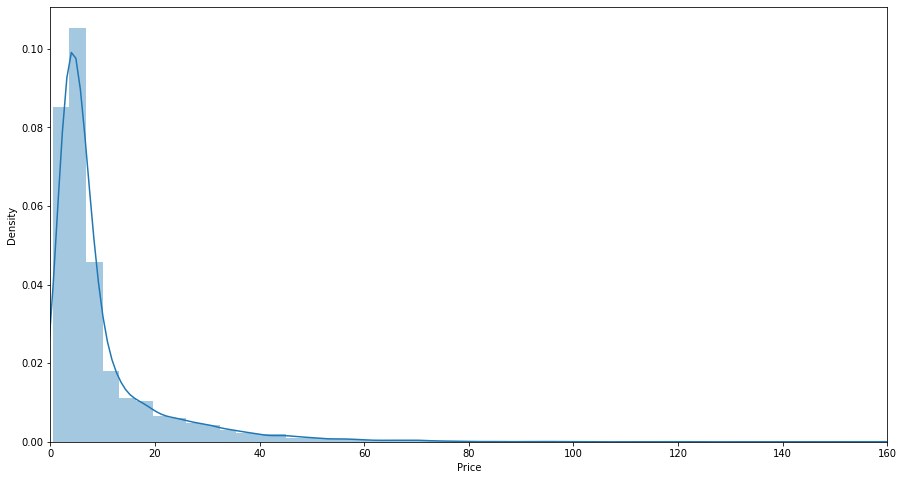

In [ ]:
f, ax = plt.subplots(figsize=(15,8))
sns.distplot(train['Price'])
plt.xlim([0,160])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


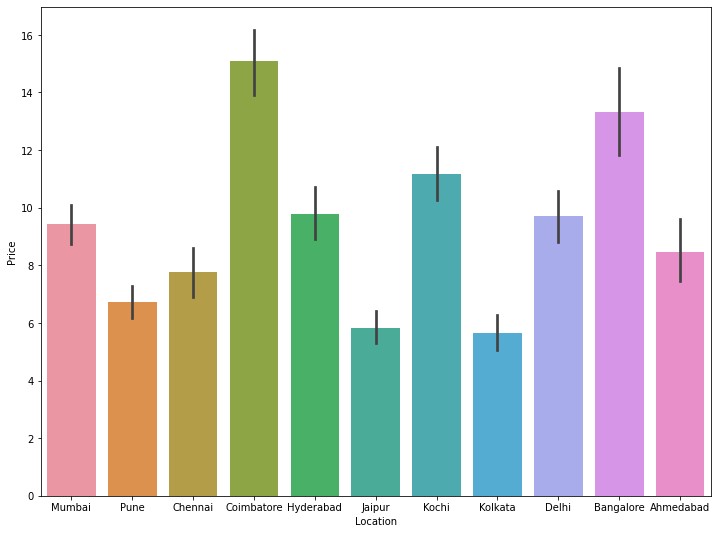

In [ ]:
plt.figure(figsize=(12, 9))
sns.barplot('Location', 'Price', data=train)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


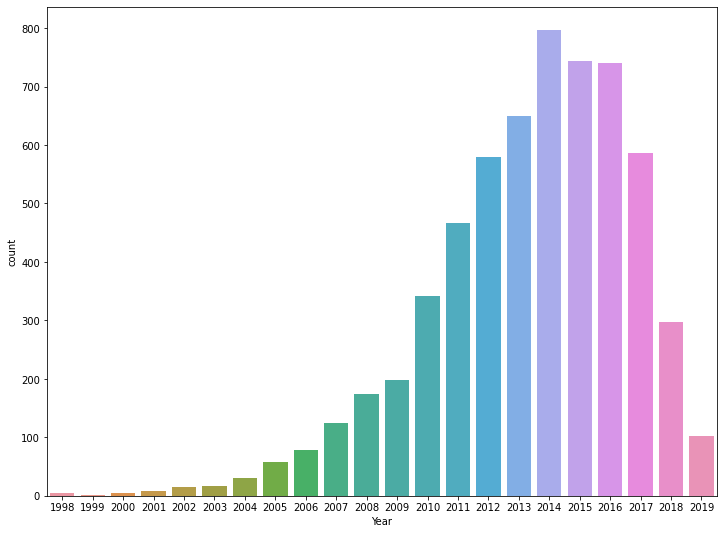

In [ ]:
plt.figure(figsize=(12, 9))
sns.countplot('Year', data=train)

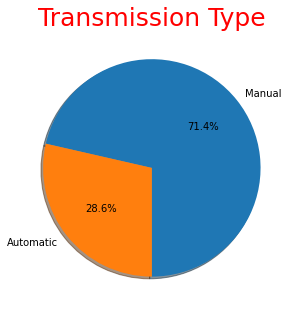

In [ ]:
plt.figure(figsize=(12,5))
labels =train['Transmission'].value_counts(sort = True).index
sizes = train['Transmission'].value_counts(sort = True)
plt.pie(sizes, labels=labels,autopct='%1.1f%%', shadow=True, startangle=270)
plt.title('Transmission Type',size = 25,c="r")
plt.show()

Text(0.5, 0, 'Kilometer')

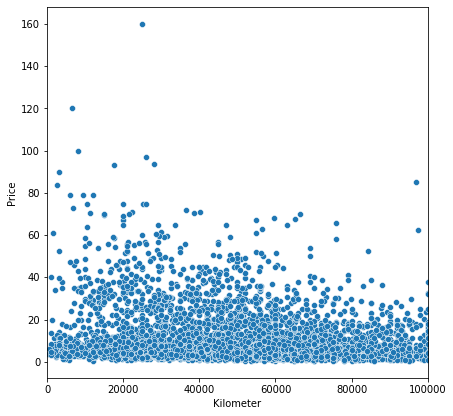

In [ ]:
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
ax1 = fig.add_subplot(2,2,1)
plt.xlim([0, 100000])
p1 = sns.scatterplot(x="Kilometers_Driven", y="Price", data=train)
loc, labels = plt.xticks()
ax1.set_xlabel('Kilometer')

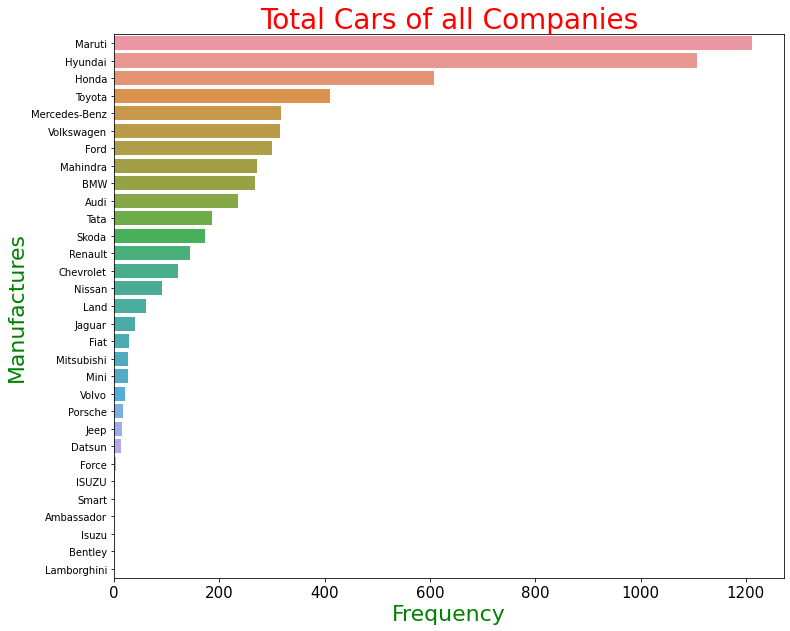

In [ ]:
plt.figure(figsize=(12,10))
most_cat = train['Name'].value_counts()
sns.barplot(x=most_cat, y=most_cat.index, data=train)
plt.xticks(size=15)
plt.xlabel("Frequency",size=22,c="g")
plt.ylabel("Manufactures",size=22,c="g")
plt.title("Total Cars of all Companies",size=28,c="r")
plt.show()

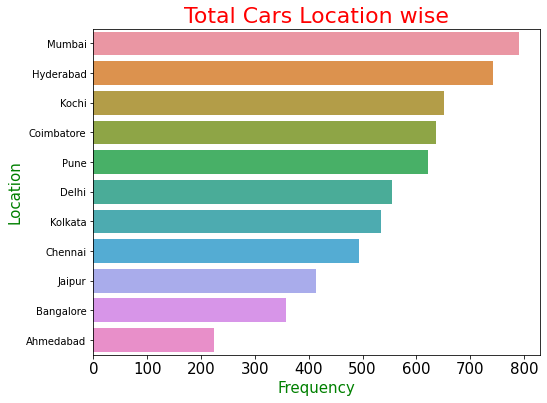

In [ ]:
plt.figure(figsize=(8,6))
most_cat = train['Location'].value_counts()
sns.barplot(x=most_cat, y=most_cat.index, data=train)
plt.xticks(size=15)
plt.xlabel("Frequency",size=15,c="g")
plt.ylabel("Location",size=15,c="g")
plt.title("Total Cars Location wise",size=22,c="r")
plt.show()

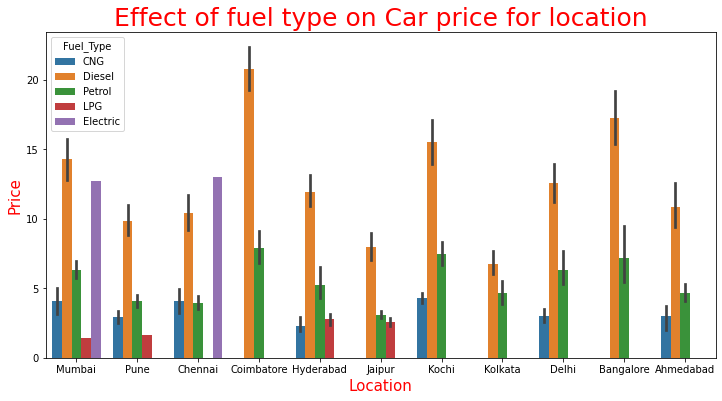

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=train,y="Price",x='Location',hue='Fuel_Type')
plt.xlabel("Location",size=15,c="r")
plt.ylabel("Price",size=15,c="r")
plt.title("Effect of fuel type on Car price for location",size=25,c="red")
plt.show()

Text(0, 0.5, 'Frequency')

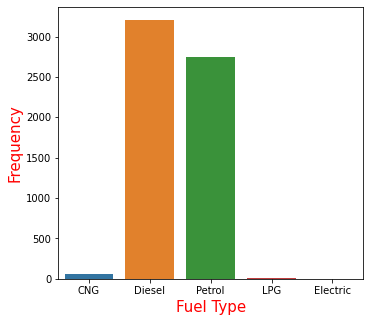

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(data=train,x="Fuel_Type")
plt.xlabel("Fuel Type",size=15,c="r")
plt.ylabel("Frequency",size=15,c="r")

In [ ]:
feature = ['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 
           'Owner_Type', 'Seats','Price', 'Mileage_','Eng','Pow','Model']
train = pd.DataFrame(train, columns=feature)

feature1 = ['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 
           'Owner_Type', 'Seats', 'Mileage_','Eng','Pow','Model']
test = pd.DataFrame(test, columns=feature1)

In [ ]:
labels = {}
for col in train.select_dtypes(exclude = np.number).columns.tolist():
    le = LabelEncoder().fit(pd.concat([train[col].astype(str),test[col].astype(str)]))   
    train[col] = le.transform(train[col].astype(str))
    test[col] = le.transform(test[col].astype(str))
    labels [col] = le
print('Categorical columns:', list(labels.keys()))

Categorical columns: ['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage_', 'Eng', 'Pow', 'Model']


In [ ]:
train

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Mileage_,Eng,Pow,Model
0,19,9,2010,72000,0,1,0,5.0,1.75,399,150,271,196
1,11,10,2015,41000,1,1,0,5.0,12.50,275,42,57,56
2,10,2,2011,46000,4,1,0,5.0,4.50,233,12,357,103
3,19,2,2012,87000,1,1,0,7.0,6.00,307,14,359,72
4,1,3,2013,40670,1,0,2,5.0,17.74,137,62,78,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,19,4,2014,27365,1,1,0,5.0,4.75,409,14,311,176
6015,11,6,2015,100000,1,1,0,5.0,4.00,374,3,302,209
6016,18,6,2012,55000,1,1,2,8.0,2.90,94,98,30,211
6017,19,8,2013,46000,4,1,0,5.0,2.65,254,150,294,196


In [ ]:
test

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Mileage_,Eng,Pow,Model
0,19,4,2014,40929,0,1,0,4.0,412,150,272,19
1,19,3,2013,54493,4,1,2,5.0,378,143,252,19
2,30,9,2017,34000,1,1,0,7.0,88,88,88,102
3,30,5,2012,139000,1,1,0,5.0,364,19,385,75
4,11,9,2014,29000,4,1,0,5.0,242,10,334,217
...,...,...,...,...,...,...,...,...,...,...,...,...
1229,31,5,2011,89411,1,1,0,5.0,298,49,13,188
1230,31,9,2015,59000,4,0,0,5.0,201,10,13,138
1231,23,8,2012,28000,1,1,0,5.0,356,30,280,119
1232,31,10,2013,52262,4,0,3,5.0,200,10,13,138


In [ ]:
from sklearn.model_selection import train_test_split
Y = train['Price']
X = train.drop(columns=['Price'])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=9)

print('X train shape: ', X_train.shape)
print('Y train shape: ', y_train.shape)
print('X test shape: ', X_test.shape)
print('Y test shape: ', y_test.shape)

X train shape:  (5116, 12)
Y train shape:  (5116,)
X test shape:  (903, 12)
Y test shape:  (903,)


In [ ]:
Acc = pd.DataFrame(index=None, columns=['model','Accuracy on Traing set','Accuracy on Testing set'])

In [ ]:
X_test

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Mileage_,Eng,Pow,Model
4719,30,2,2014,250000,1,1,0,8.0,67,94,1,102
2233,30,5,2017,35358,1,0,0,7.0,23,107,126,102
1725,19,9,2017,5500,4,1,0,5.0,328,32,9,46
3322,10,4,2016,19000,4,0,0,5.0,144,11,348,20
1527,11,2,2012,49000,4,1,0,5.0,290,10,323,216
...,...,...,...,...,...,...,...,...,...,...,...,...
1674,11,3,2018,22684,4,1,0,5.0,247,10,329,217
1959,8,2,2006,87000,4,1,2,5.0,140,47,2,79
1675,10,1,2014,43521,4,1,0,5.0,268,11,351,34
5188,11,1,2012,79000,1,0,0,5.0,337,42,57,191


In [ ]:
regressors = [['DecisionTreeRegressor',DecisionTreeRegressor()],
              ['AdaBoostRegressor',AdaBoostRegressor()],
              ['RandomForestRegressor',RandomForestRegressor()],
              ['LinearRegression',LinearRegression()]]


for mod in regressors:
    name = mod[0]
    model = mod[1]
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)

    ATrS =  model.score(X_train,y_train)
    ATeS = model.score(X_test,y_test)
    Acc = Acc.append(pd.Series({'model':name,'Accuracy on Traing set':ATrS,'Accuracy on Testing set':ATeS}),ignore_index=True )

In [ ]:
Acc.sort_values(by='Accuracy on Testing set')

,model,Accuracy on Traing set,Accuracy on Testing set
3,LinearRegression,0.553906,0.123156
1,AdaBoostRegressor,0.502540,0.463638
0,DecisionTreeRegressor,0.999998,0.795992
2,RandomForestRegressor,0.984380,0.854619


In [ ]:
given_data=np.array([30,	9,	2017,	34000,	1,	1,	0,	7.0	,88,	88,	88,	102])

In [ ]:
x_testdata_rf = test.iloc[:, :].values
mod = RandomForestRegressor()
mod.fit(X,Y)
ytestpredict_rf = mod.predict(x_testdata_rf)
test["Predicted Price(Random Forest)"] = ytestpredict_rf
test

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Mileage_,Eng,Pow,Model,Predicted Price(Random Forest)
0,19,4,2014,40929,0,1,0,4.0,412,150,272,19,3.176900
1,19,3,2013,54493,4,1,2,5.0,378,143,252,19,2.609800
2,30,9,2017,34000,1,1,0,7.0,88,88,88,102,17.506500
3,30,5,2012,139000,1,1,0,5.0,364,19,385,75,3.484400
4,11,9,2014,29000,4,1,0,5.0,242,10,334,217,4.892100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,31,5,2011,89411,1,1,0,5.0,298,49,13,188,4.288400
1230,31,9,2015,59000,4,0,0,5.0,201,10,13,138,6.360400
1231,23,8,2012,28000,1,1,0,5.0,356,30,280,119,2.734000
1232,31,10,2013,52262,4,0,3,5.0,200,10,13,138,5.238700


In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Error          : ', metrics.r2_score(y_test, y_pred))

		Error Table
Mean Absolute Error      :  4.323501878856504
Mean Squared  Error      :  101.65947325453705
Root Mean Squared  Error :  10.08263225822191
R Squared Error          :  0.12315587942668504
